In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [45]:
df1=pd.read_csv("C:/Users/admin/Downloads/Telegram Desktop/Loan(Logistic Regression).csv")
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [46]:
df=df1.drop('Loan_ID',axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [47]:
#Checking if there is some null value or not
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
#Checking data types of the elements in the dataframe (i.e. checking if all elements aur of numeric data type or not)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [49]:
#Taking mode of columns (data type='object') having missing values 
r1=df['Gender'].mode().values[0]
r2=df['Married'].mode().values[0]
r3=df['Dependents'].mode().values[0]
r4=df['Self_Employed'].mode().values[0]

In [50]:
#Replacing elements with missing values (data type='object') with mode value
df['Gender']=df['Gender'].replace(np.nan,r1)
df['Married']=df['Married'].replace(np.nan,r2)
df['Dependents']=df['Dependents'].replace(np.nan,r3)
df['Self_Employed']=df['Self_Employed'].replace(np.nan,r4)

In [51]:
#Taking mean of columns (data type='float') having missing values 
m1=df['LoanAmount'].mean()
m2=df['Loan_Amount_Term'].mean()
m3=df['Credit_History'].mean()

In [52]:
#Replacing elements with missing values (data type='float') with mode value
df['LoanAmount']=df['LoanAmount'].replace(np.nan,m1)
df['Loan_Amount_Term']=df['Loan_Amount_Term'].replace(np.nan,m2)
df['Credit_History']=df['Credit_History'].replace(np.nan,m3)

In [53]:
#Checking null values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
# Apply label encoding in order to convert string values into numeric data type
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [55]:
df['Gender_n']=label_encoder.fit_transform(df['Gender'])
df['Married_n']=label_encoder.fit_transform(df['Married'])
df['Dependents_n']=label_encoder.fit_transform(df['Dependents'])
df['Education_n']=label_encoder.fit_transform(df['Education'])
df['Self_Employed_n']=label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area_n']=label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status_n']=label_encoder.fit_transform(df['Loan_Status'])

In [56]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_n,Married_n,Dependents_n,Education_n,Self_Employed_n,Property_Area_n,Loan_Status_n
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0,0,0,0,2,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1,1,1,0,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,1,0,0,1,2,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,1,0,1,0,2,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,0,0,0,0,0,0,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,1,1,3,0,0,0,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,1,1,1,0,0,2,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,1,1,2,0,0,2,1


In [57]:
df_n = df.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],axis='columns')
df_n

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_n,Married_n,Dependents_n,Education_n,Self_Employed_n,Property_Area_n,Loan_Status_n
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,2,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,1,2,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,1,0,2,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,1
610,4106,0.0,40.000000,180.0,1.0,1,1,3,0,0,0,1
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,2,1
612,7583,0.0,187.000000,360.0,1.0,1,1,2,0,0,2,1


In [58]:
#Checking if all the entries are of numeric data type or not
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Gender_n             614 non-null int32
Married_n            614 non-null int32
Dependents_n         614 non-null int32
Education_n          614 non-null int32
Self_Employed_n      614 non-null int32
Property_Area_n      614 non-null int32
Loan_Status_n        614 non-null int32
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [59]:
#Creating 'X' with all "independent features"
X=df_n.iloc[:,:-1]
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_n,Married_n,Dependents_n,Education_n,Self_Employed_n,Property_Area_n
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,2
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,1,2
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,1,0,2
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,1,1,3,0,0,0
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,2
612,7583,0.0,187.000000,360.0,1.0,1,1,2,0,0,2


In [60]:
#Creating 'y' with all "dependent features"
y=df_n.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_n, Length: 614, dtype: int32

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=1)

In [62]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
L_reg=LogisticRegression()
L_reg.fit(X_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
predLR=L_reg.predict(X_test)
predLR

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [64]:
from sklearn.metrics import confusion_matrix,f1_score
cm_LR=confusion_matrix(y_test,predLR)
cm_LR

array([[16, 23],
       [ 2, 82]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score
a_LR=accuracy_score(y_test,predLR)
print("Accuracy score of Logistic Regression:",a_LR)

Accuracy score of Logistic Regression: 0.7967479674796748


In [66]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
D_tree=DecisionTreeClassifier()
D_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
predDT=D_tree.predict(X_test)
predDT

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [68]:
from sklearn.metrics import confusion_matrix,f1_score
cm_DT=confusion_matrix(y_test,predDT)
cm_DT

array([[22, 17],
       [16, 68]], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score
a_DT=accuracy_score(y_test,predDT)
print("Accuracy score of Decision Tree:",a_DT)

Accuracy score of Decision Tree: 0.7317073170731707


In [70]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
s_model=SVC()
s_model.fit(X_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [71]:
predSVC=s_model.predict(X_test)
predSVC

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [72]:
from sklearn.metrics import confusion_matrix,f1_score
cm_SVC=confusion_matrix(y_test,predSVC)
cm_SVC

array([[ 0, 39],
       [ 0, 84]], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score
a_SVC=accuracy_score(y_test,predSVC)
print("Accuracy score of Support Vector Machine:",a_SVC)

Accuracy score of Support Vector Machine: 0.6829268292682927


In [74]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
RF_classifier=RandomForestClassifier(n_estimators=20)
RF_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
predRF=RF_classifier.predict(X_test)
predRF

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [76]:
from sklearn.metrics import confusion_matrix,f1_score
cm_RF=confusion_matrix(y_test,predRF)
cm_RF

array([[19, 20],
       [ 6, 78]], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score
a_RF=accuracy_score(y_test,predRF)
print("Accuracy score of Random Forest:",a_RF)

Accuracy score of Random Forest: 0.7886178861788617


In [78]:
Tp=cm_RF[0][0]
Fn=cm_RF[0][1]
Fp=cm_RF[1][0]
Tn=cm_RF[1][1]
precision=Tp/(Tp+Fp)
recall=Tp/(Tp+Fn)
f1score=2*(recall*precision)/(recall+precision)
print("Recall:",recall)
print("Precision:",precision)
print("F1_score:",f1score)

Recall: 0.48717948717948717
Precision: 0.76
F1_score: 0.59375


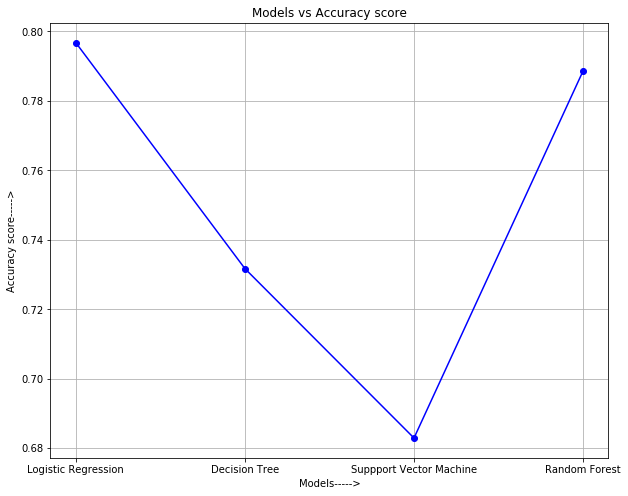

In [79]:
#Plotting scatter plot of accuracy score of different models (i.e. to compare accuracy score)
plt.figure(figsize=(10,8))
a_score=[a_LR,a_DT,a_SVC,a_RF]
m=['Logistic Regression','Decision Tree','Suppport Vector Machine','Random Forest']
plt.plot(m,a_score,'bo',linestyle='solid')
plt.grid()
plt.xlabel("Models----->")
plt.ylabel("Accuracy score----->")
plt.title("Models vs Accuracy score")
plt.show()

In [80]:
print("Therefore, for the given data best accuracy score is shown by Logistic Regression. Hence, it is the best model for this given data.")

Therefore, for the given data best accuracy score is shown by Logistic Regression. Hence, it is the best model for this given data.
